In [1]:
###   Importação de bibliotecas   ###

In [2]:

import TCC_supercon_dados as tsd
import TCC_supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
### Divisão dos dados que serão usados em um processão de validação cruzada para obtenção de melhores parâmetros  ###

In [4]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

In [5]:
###   Treinamento do modelo com os melhores hiperparâmetros   ###

In [6]:
treino=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)
treino.fit(X_treino,Y_treino)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [7]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino.predict(X_treino),Y_treino)))


 R^2: 
 0.9794133011147383 
 RMSE : 
 4.90826125903588


In [8]:
###   Imprime o resultado dos dados nunca treinados   ###

print('\n R^2: \n', treino.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino.predict(X_teste),Y_teste)))


 R^2: 
 0.9349419147022398 
 RMSE : 
 8.703221318613455


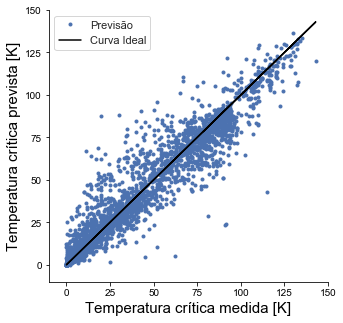

In [9]:
###   Gráfico que mostra sa previsões sobre o conjunto de teste   ###


print_x = Y_teste
print_y = treino.predict(X_teste)

f, ax = plt.subplots(figsize=(5, 5))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])

plt.show()

In [10]:
###   Análise por faixa de temperatura   ###

In [11]:
#Dados das previsões e do bando de dados NIMS

dados_agrupamento=pd.DataFrame({'Y_teste':Y_teste ,'Y_previsto':treino.predict(X_teste)})


# condições para avaliar as faixas de temperatura

def agrupar(x):

  if x['Y_teste']<=25.67:

    return 1

  elif  x['Y_teste']<=51.33:

    return 2

  elif x['Y_teste']<= 77:

    return 3

  elif x['Y_teste'] <= 113.5:

    return 4
  
  elif x['Y_teste']<=150:

    return 5

In [12]:
# Apresenta a segmentação aos dados

dados_agrupamento['grupo'] = dados_agrupamento.apply(agrupar, axis=1)

In [13]:
# Calcula o erro em cada grupo

erros=[]
i_grupo=[]
#r2 = []

for i in [1,2,3,4,5]:    

    #r2.append(r2_score(dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_teste'],dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_previsto']))
    erros.append(np.sqrt(mean_squared_error(dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_teste'],dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_previsto'])))
    i_grupo.append(i)

In [14]:
np.array([erros,i_grupo])

array([[ 6.01485882, 11.00555209, 11.38364166, 11.06064134, 12.36033044],
       [ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ]])

[-10, 150, -10, 150]

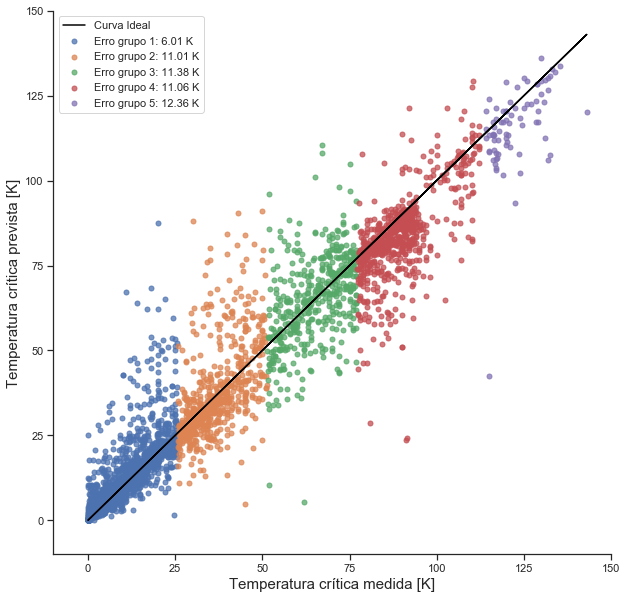

In [15]:
###   Plota a análise em cada faixa de temperatura   ###

fig, ax = plt.subplots(figsize=(10, 10))

sns.despine()

for i in [1,2,3,4,5]:

    legenda = "Erro grupo " + str(i) + ': ' +str(float("{0:.2f}".format(float(erros[i-1])))) + ' K'
    
    ax.scatter(dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_teste'], dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_previsto'],label=legenda, s=25, alpha=.75)

ax.plot(print_x,print_x, '-', label = 'Curva Ideal',color='black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])


In [16]:
###   Avaliando as principais características do modelo   ###

In [17]:
#Conjunto de dados usados para avaliar os melhores parâmetros

importancia = pd.DataFrame(np.transpose(treino.feature_importances_),index=X_treino.columns)
importancia_ordenada=importancia.sort_values(ascending=False,by=[0])
importancia_ordenada_top_15=np.transpose(importancia_ordenada.iloc[0:15,:])
importancia_ordenada_top_5=np.transpose(importancia_ordenada.iloc[0:5,:])

In [18]:
###   As 15 características mais importantes do modelo   ###

([<matplotlib.axis.XTick at 0x23d2adabac8>,
 <a list of 6 Text xticklabel objects>)

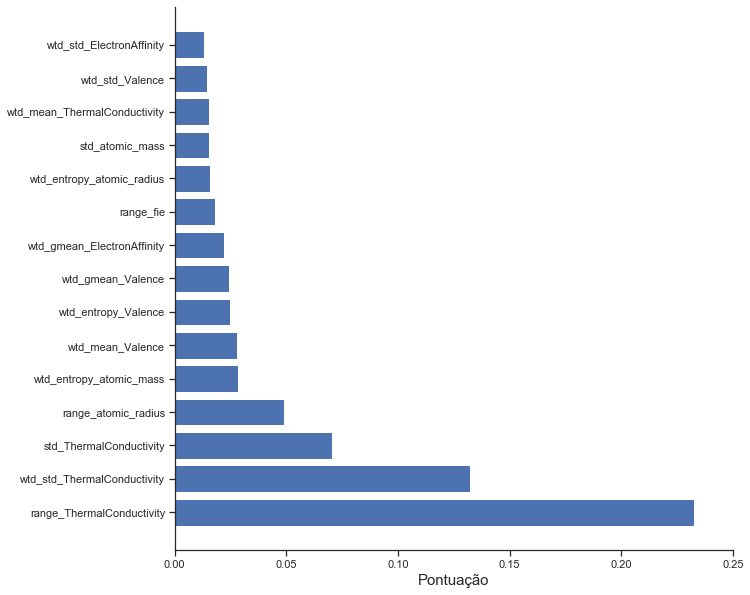

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.despine()
plt.barh(importancia_ordenada_top_15.columns, importancia_ordenada_top_15.values[0],color="b")
plt.xlabel('Pontuação',fontsize = 15)
plt.xticks(np.linspace(0, 0.25, 6, endpoint=True))

In [20]:
X_treino_importancia = X_treino.loc[:,importancia_ordenada_top_15.columns]
X_teste_importancia = X_teste.loc[:,importancia_ordenada_top_15.columns]

In [21]:
treino_importancia=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [22]:
treino_importancia.fit(X_treino_importancia,Y_treino)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [23]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia.score(X_treino_importancia,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia.predict(X_treino_importancia),Y_treino)))


 R^2: 
 0.9734538842863989 
 RMSE : 
 5.573587286717819


In [24]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia.score(X_teste_importancia,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia.predict(X_teste_importancia),Y_teste)))


 R^2: 
 0.9311429861386339 
 RMSE : 
 8.95371942375468


In [25]:
###   As 5 principais características do modelo   ###

([<matplotlib.axis.XTick at 0x23d2af00f08>,
 <a list of 6 Text xticklabel objects>)

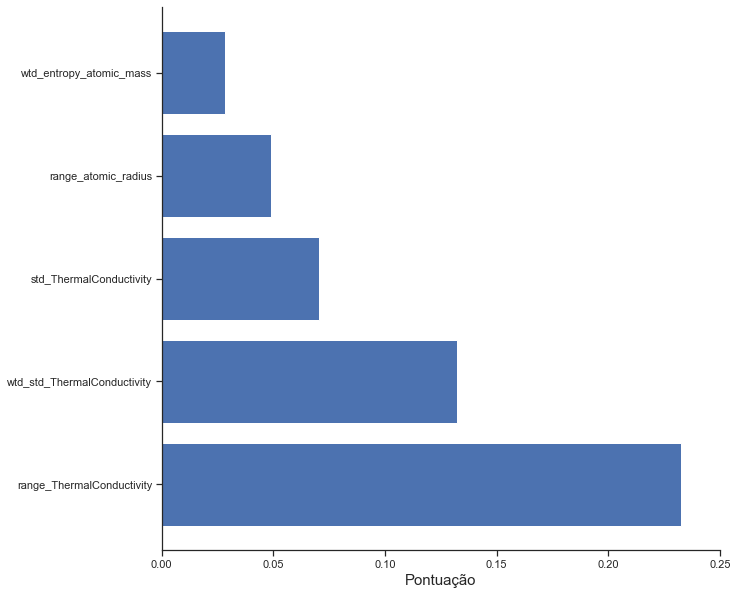

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.despine()
plt.barh(importancia_ordenada_top_5.columns, importancia_ordenada_top_5.values[0],color="b")
plt.xlabel('Pontuação',fontsize = 15)
plt.xticks(np.linspace(0, 0.25, 6, endpoint=True))

In [27]:
X_treino_importancia_5 = X_treino.loc[:,importancia_ordenada_top_5.columns]
X_teste_importancia_5 = X_teste.loc[:,importancia_ordenada_top_5.columns]

In [28]:
treino_importancia_5=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [29]:
treino_importancia_5.fit(X_treino_importancia_5,Y_treino)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
                    max_features=None, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=4,
                    min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [30]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia_5.score(X_treino_importancia_5,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia_5.predict(X_treino_importancia_5),Y_treino)))


 R^2: 
 0.9240372199386601 
 RMSE : 
 9.428329257260712


In [31]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino_importancia_5.score(X_teste_importancia_5,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino_importancia_5.predict(X_teste_importancia_5),Y_teste)))


 R^2: 
 0.8830476444593408 
 RMSE : 
 11.66900633081142


In [32]:
### Testes com supercondutores do DEMAR EEL USP ###

In [33]:
# 9.5 K no Ti2GeC
# 4.1 K no HfV2Ga4
# 4.0 K no NiTe2
# 3.1 K no Ti2InC
# 7.8 K no Nb2SnC
# 8.7 K no Zr0.96V0.04B2
# 15.3 K no Nb5Ge3
# 7 K no Zr5Pt3C0.3

In [34]:
# 9.5 K no Ti2GeC

treino.predict(tsd.analisar('Ti2GeC'))

array([8.21045968])

In [35]:
# 4.1 K no HfV2Ga4

treino.predict(tsd.analisar('HfV2Ga4'))

array([6.2450914])

In [36]:
# 4.0 K no NiTe2

treino.predict(tsd.analisar('NiTe2'))

array([3.73482785])

In [37]:
# 3.1 K no Ti2InC

treino.predict(tsd.analisar('Ti2InC'))

array([3.90690914])

In [38]:
# 7.8 K no Nb2SnC

treino.predict(tsd.analisar('Nb2SnC'))

array([6.01433501])

In [39]:
# 8.7 K no Zr0.96V0.04B2

treino.predict(tsd.analisar('Zr0.96V0.04B2'))

array([7.88575759])

In [40]:
# 15.3 K no Nb5Ge3

treino.predict(tsd.analisar('Nb5Ge3'))

array([1.32293823])

In [41]:
# 7 K no Zr5Pt3C0.3

treino.predict(tsd.analisar('Zr5Pt3C0.3'))

array([5.81840327])